In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [24]:
df = pd.DataFrame()
df = pd.read_csv("Dataset 6 - Music Dataset/Dataset 6 - Music Dataset/music.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [25]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [26]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [27]:
datatypes = df.dtypes
datatypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [28]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [29]:
old_length = len(df)
df = df.drop_duplicates(keep = 'first', inplace = False)
new_length = len(df)

(str(new_length - old_length) + " rows were dropped")

'0 rows were dropped'

### As mentioned in the PDF, values were a key was not detected will be set to -1

In [33]:
na_key_df = df[pd.isna(df['key'])]
print("Null keys = "+str(len(na_key_df)))

key_df = df[df['key'] == -1]
print("-1 Keys = "+str(len(key_df)))

Null keys = 2014
-1 Keys = 0


### Look through dataset for multiple representations and to understand the values better

In [36]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Artist Name column is being written
Artist Name has been written
Track Name column is being written
Track Name has been written
Popularity column is being written
Popularity has been written
danceability column is being written
danceability has been written
energy column is being written
energy has been written
key column is being written
key has been written
loudness column is being written
loudness has been written
mode column is being written
mode has been written
speechiness column is being written
speechiness has been written
acousticness column is being written
acousticness has been written
instrumentalness column is being written
instrumentalness has been written
liveness column is being written
liveness has been written
valence column is being written
valence has been written
tempo column is being written
tempo has been written
duration_in min/ms column is being written
duration_in min/ms has been written
time_signature column is being written
time_signature has been written
Cl

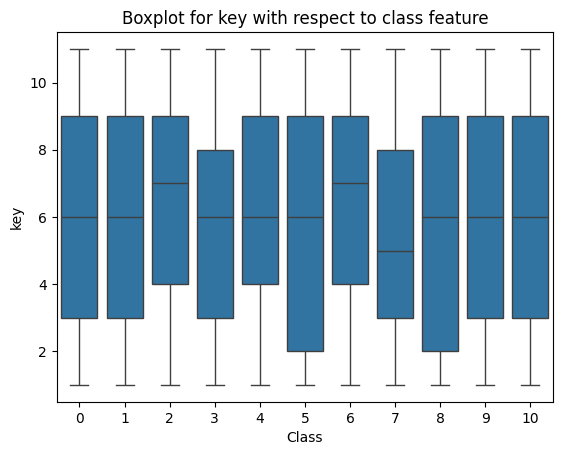

<Figure size 400x600 with 0 Axes>

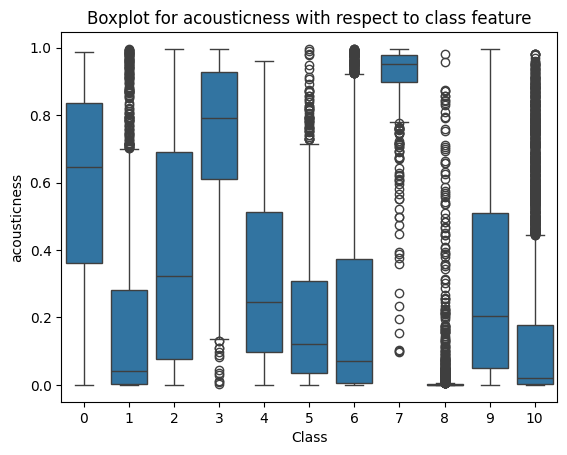

<Figure size 400x600 with 0 Axes>

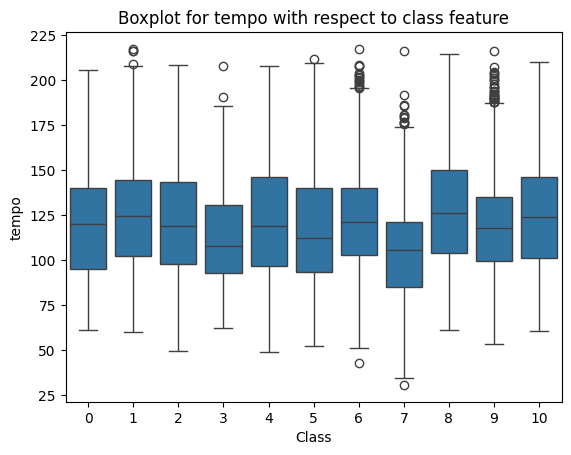

<Figure size 400x600 with 0 Axes>

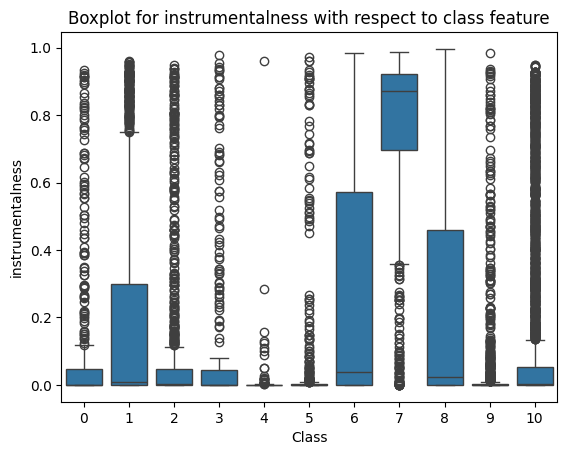

<Figure size 400x600 with 0 Axes>

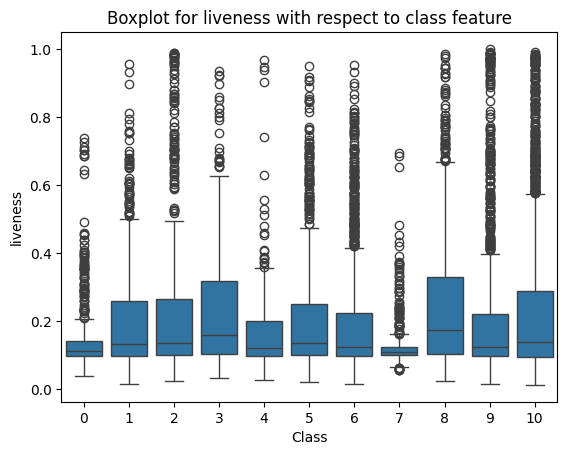

<Figure size 400x600 with 0 Axes>

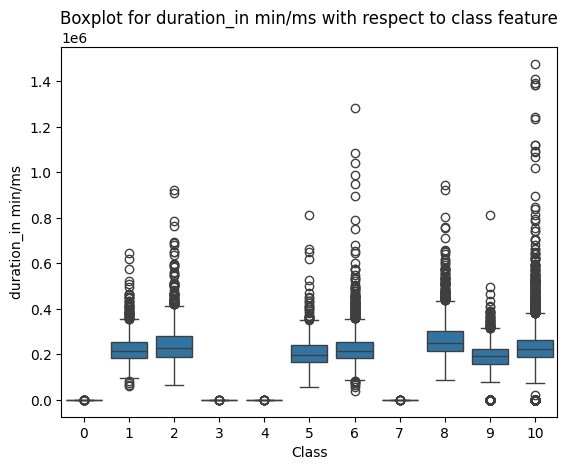

<Figure size 400x600 with 0 Axes>

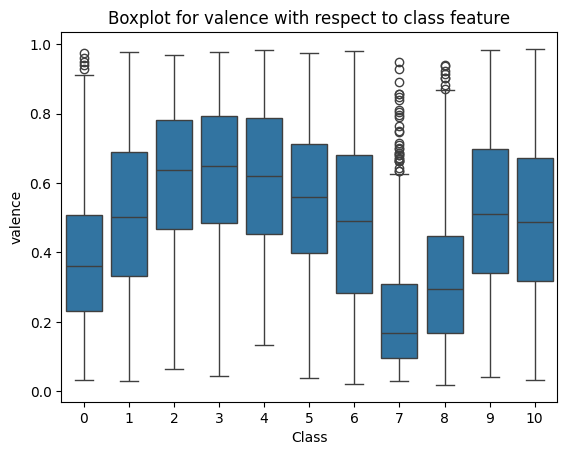

<Figure size 400x600 with 0 Axes>

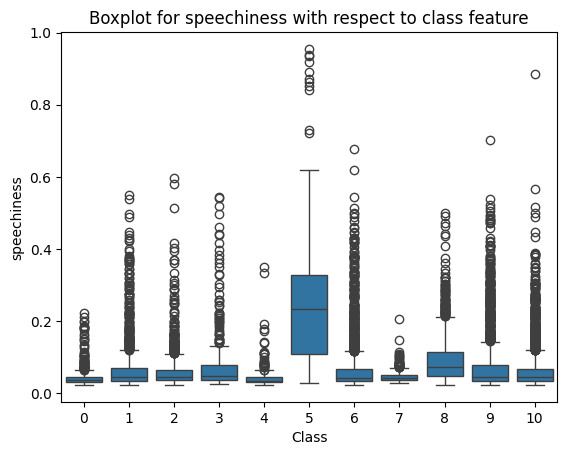

<Figure size 400x600 with 0 Axes>

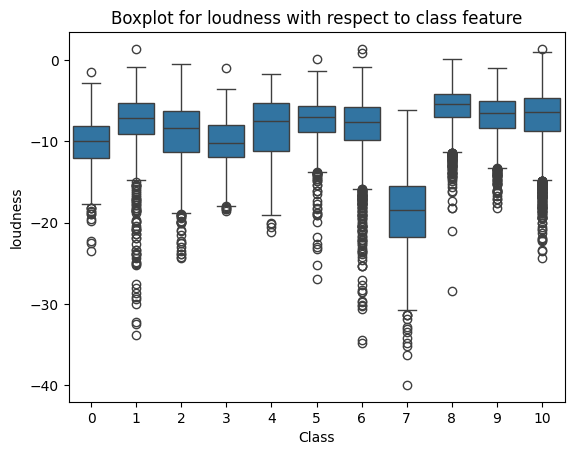

<Figure size 400x600 with 0 Axes>

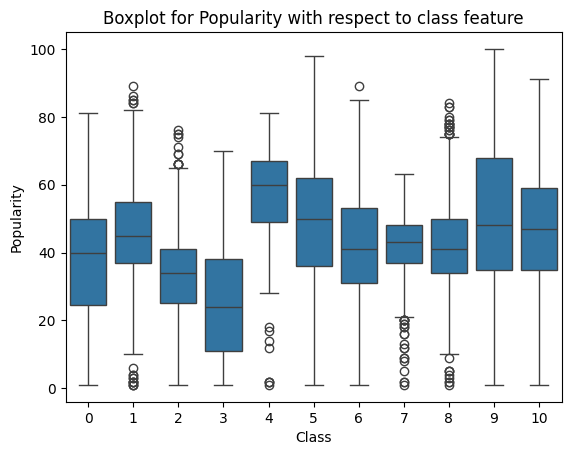

<Figure size 400x600 with 0 Axes>

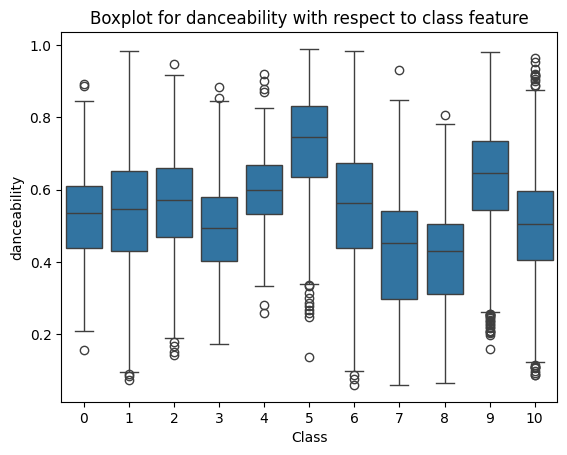

<Figure size 400x600 with 0 Axes>

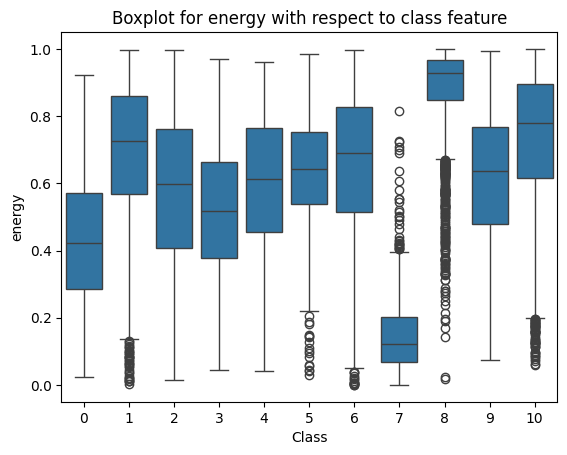

<Figure size 400x600 with 0 Axes>

In [43]:
columns_notype = set(df.columns) - set(['Artist Name', 'Track Name', 'Class', 'mode','time_signature'])
columns_notype = list(columns_notype)

for col in columns_notype:
    sns.boxplot(df, x = 'Class', y = col)
    plt.title("Boxplot for " + col + " with respect to class feature")
    plt.figure(figsize=(4, 6))
    plt.show()

In [52]:
outlier_info = {}

for cls in range(10):
    outlier_info[cls] = {}
    
    
    class_data = df[df['Class'] == cls]
    
    
    for column in columns_notype:
        if column == 'Class':
            continue  # Skip the class column

        
        Q1 = class_data[column].quantile(0.25)
        Q3 = class_data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = class_data[(class_data[column] < lower_bound) | (class_data[column] > upper_bound)]
        
        
        outlier_info[cls][column] = {
            'count': len(outliers),
            'values': outliers[column].tolist()
        }

for cls, features in outlier_info.items():
    print(f"Class: {cls}")
    for feature, info in features.items():
        print(f"  Feature: {feature}")
        print(f"    Outliers Count: {info['count']}")
        print(f"    Outlier Values: {info['values']}")

Class: 0
  Feature: key
    Outliers Count: 0
    Outlier Values: []
  Feature: acousticness
    Outliers Count: 0
    Outlier Values: []
  Feature: tempo
    Outliers Count: 0
    Outlier Values: []
  Feature: instrumentalness
    Outliers Count: 87
    Outlier Values: [0.892, 0.726, 0.671, 0.786, 0.264, 0.821, 0.146, 0.158, 0.136, 0.327, 0.504, 0.391, 0.925, 0.903, 0.209, 0.503, 0.744, 0.184, 0.408, 0.763, 0.757, 0.495, 0.268, 0.617, 0.823, 0.216, 0.203, 0.436, 0.688, 0.597, 0.123, 0.899, 0.151, 0.16, 0.294, 0.687, 0.139, 0.349, 0.814, 0.39, 0.337, 0.912, 0.765, 0.554, 0.348, 0.213, 0.199, 0.865, 0.829, 0.914, 0.528, 0.555, 0.791, 0.681, 0.916, 0.437, 0.189, 0.801, 0.92, 0.645, 0.287, 0.326, 0.589, 0.581, 0.257, 0.565, 0.568, 0.892, 0.118, 0.22, 0.15, 0.459, 0.672, 0.385, 0.292, 0.603, 0.261, 0.448, 0.395, 0.479, 0.386, 0.837, 0.854, 0.933, 0.291, 0.247, 0.296]
  Feature: liveness
    Outliers Count: 84
    Outlier Values: [0.355, 0.365, 0.375, 0.368, 0.712, 0.23, 0.685, 0.354, 0.287

In [53]:
os.makedirs('dumps', exist_ok=True)


with open('dumps/outliers_info.txt', 'w') as file:
    for cls, features in outlier_info.items():
        file.write(f"Class: {cls}\n")
        for feature, info in features.items():
            file.write(f"  Feature: {feature}\n")
            file.write(f"    Outliers Count: {info['count']}\n")
            file.write(f"    Outlier Values: {info['values']}\n\n")

print("Outlier information exported to 'dumps/outliers_info.txt'")

Outlier information exported to 'dumps/outliers_info.txt'
